In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import tensorflow as tf

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.layers import Dropout

Using TensorFlow backend.


In [3]:
dataset = pd.read_csv("../data/gesture4.txt")

In [4]:
dataset.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,gesture
0,0.41,0.48,0.01,0.22,1.00,0.28,0.12,0.30,0.07,0.14,0.00,0.06,0.22,0.09,0.32,0.08,3
1,0.13,0.18,0.08,0.13,0.52,0.32,0.52,0.26,0.12,0.02,0.07,0.00,1.00,0.34,0.39,0.21,3
2,0.02,0.04,0.00,0.59,0.31,0.07,0.48,0.56,0.10,1.00,0.20,0.04,0.85,0.01,0.61,0.47,3
3,0.22,0.53,0.00,0.53,0.46,0.02,0.87,0.01,0.28,0.50,0.20,0.24,1.00,0.05,0.20,0.18,3
4,0.46,0.58,0.28,0.08,0.48,0.31,1.00,0.89,0.01,0.13,0.06,0.04,0.80,0.70,0.58,0.86,3


# In, Out, Fist, Goat

In [5]:
dataset = dataset.dropna()
dataset_train = np.array(dataset)
dataset_train = dataset_train[np.random.permutation(len(dataset_train))]
X_train = dataset_train[:,:-1]
Y_train = dataset_train[:,-1:]

In [6]:
Y_train = [int(i) for i in Y_train]
Y_train = np.eye(np.max(Y_train) + 1)[Y_train]
Y_train.shape

(2155, 4)

In [7]:
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

In [8]:
model = Sequential()

model.add(Dense(16, input_shape=(16,)))
model.add(Dropout(0.2))

model.add(Dense(16))
model.add(Dropout(0.2))

model.add(Dense(4, activation="softmax"))

In [9]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, Y_train,validation_split=0.2, epochs = 50, batch_size = 8, verbose=2)

Train on 1724 samples, validate on 431 samples
Epoch 1/50
 - 0s - loss: 0.4623 - accuracy: 0.7894 - val_loss: 0.3218 - val_accuracy: 0.8799
Epoch 2/50
 - 0s - loss: 0.3038 - accuracy: 0.8727 - val_loss: 0.2026 - val_accuracy: 0.9263
Epoch 3/50
 - 0s - loss: 0.2321 - accuracy: 0.9070 - val_loss: 0.1622 - val_accuracy: 0.9432
Epoch 4/50
 - 0s - loss: 0.1970 - accuracy: 0.9220 - val_loss: 0.1450 - val_accuracy: 0.9461
Epoch 5/50
 - 0s - loss: 0.1830 - accuracy: 0.9305 - val_loss: 0.1322 - val_accuracy: 0.9530
Epoch 6/50
 - 0s - loss: 0.1711 - accuracy: 0.9382 - val_loss: 0.1248 - val_accuracy: 0.9507
Epoch 7/50
 - 0s - loss: 0.1777 - accuracy: 0.9346 - val_loss: 0.1240 - val_accuracy: 0.9524
Epoch 8/50
 - 0s - loss: 0.1715 - accuracy: 0.9400 - val_loss: 0.1215 - val_accuracy: 0.9524
Epoch 9/50
 - 0s - loss: 0.1633 - accuracy: 0.9405 - val_loss: 0.1186 - val_accuracy: 0.9530
Epoch 10/50
 - 0s - loss: 0.1670 - accuracy: 0.9359 - val_loss: 0.1208 - val_accuracy: 0.9501
Epoch 11/50
 - 0s - lo

Text(0.5, 1.0, 'Accuracy')

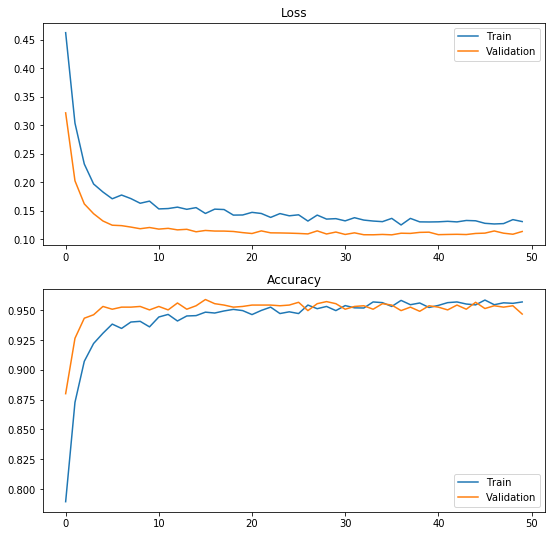

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(9,9))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["Train","Validation"])
plt.title("Loss")
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["Train","Validation"])
plt.title("Accuracy")

In [12]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 68        
Total params: 612
Trainable params: 612
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
model.save("../Data/arduino4gestures.h5")


In [10]:
from tensorflow.keras.models import load_model

In [15]:
model = load_model("../Data/arduino4gestures.h5")

In [16]:
from tinymlgen import port
print(port(model))


#ifdef __has_attribute
#define HAVE_ATTRIBUTE(x) __has_attribute(x)
#else
#define HAVE_ATTRIBUTE(x) 0
#endif
#if HAVE_ATTRIBUTE(aligned) || (defined(__GNUC__) && !defined(__clang__))
#define DATA_ALIGN_ATTRIBUTE __attribute__((aligned(4)))
#else
#define DATA_ALIGN_ATTRIBUTE
#endif

const unsigned char model_data[] DATA_ALIGN_ATTRIBUTE = {0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x12, 0x00, 0x1c, 0x00, 0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00, 0x14, 0x00, 0x00, 0x00, 0x18, 0x00, 0x12, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 0x64, 0x0f, 0x00, 0x00, 0x8c, 0x0a, 0x00, 0x00, 0x74, 0x0a, 0x00, 0x00, 0x34, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x44, 0xf1, 0xff, 0xff, 0x08, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x00, 0x00, 0x13, 0x00, 0x00, 0x00, 0x6d, 0x69, 0x6e, 0x5f, 0x72, 0x75, 0x6e, 0x74, 0x69, 0x6d, 0x65, 0x5f, 0x76, 0x65, 0x72, 0x73, 0x69, 0x6f, 0x6e, 0x00, 0x0d, 0x00, 0x00, 0x00, 0x34, 0x0a, 0x00, 0x00, 0x24, 0x06,

## Other methods

In [17]:
import numpy as np

In [18]:
from sklearn.svm import SVC

In [19]:
clf = SVC(gamma='auto')

In [20]:
clf.fit(X_train, Y_train)

ValueError: bad input shape (2155, 4)

In [21]:
clf.score(X_train, Y_train)

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, Y_train)

C:\Users\Denis\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [28]:
neigh.score(X_train, Y_train)

0.9095127610208816

# In, Out, Fist, Point


In [19]:
dataset = pd.read_csv("../data/gesture7.txt")
dataset = dataset.loc[dataset["gesture"].isin([0,1,3,5])]

In [20]:
dataset.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,gesture
0,0.41,0.48,0.01,0.22,1.00,0.28,0.12,0.30,0.07,0.14,0.00,0.06,0.22,0.09,0.32,0.08,3
1,0.13,0.18,0.08,0.13,0.52,0.32,0.52,0.26,0.12,0.02,0.07,0.00,1.00,0.34,0.39,0.21,3
2,0.02,0.04,0.00,0.59,0.31,0.07,0.48,0.56,0.10,1.00,0.20,0.04,0.85,0.01,0.61,0.47,3
3,0.22,0.53,0.00,0.53,0.46,0.02,0.87,0.01,0.28,0.50,0.20,0.24,1.00,0.05,0.20,0.18,3
4,0.46,0.58,0.28,0.08,0.48,0.31,1.00,0.89,0.01,0.13,0.06,0.04,0.80,0.70,0.58,0.86,3


In [21]:
dataset = dataset.dropna()
dataset_train = np.array(dataset)
dataset_train = dataset_train[np.random.permutation(len(dataset_train))]
X_train = dataset_train[:,:-1]
Y_train = dataset_train[:,-1:]

In [22]:
Y_train = [int(i) for i in Y_train]
for i in range(len(Y_train)):
    if (Y_train[i]>3) : Y_train[i] = 2
Y_train = np.eye(np.max(Y_train) + 1)[Y_train]
Y_train.shape

(2241, 4)

In [23]:
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

In [24]:
model = Sequential()

model.add(Dense(16, input_shape=(16,)))
model.add(Dropout(0.2))

model.add(Dense(16))
model.add(Dropout(0.2))

model.add(Dense(4, activation="softmax"))

In [25]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [26]:
history_new = model.fit(X_train, Y_train,validation_split=0.2, epochs = 50, batch_size = 8, verbose=2)

Train on 1792 samples, validate on 449 samples
Epoch 1/50
 - 0s - loss: 0.4426 - accuracy: 0.7988 - val_loss: 0.3083 - val_accuracy: 0.8747
Epoch 2/50
 - 0s - loss: 0.2671 - accuracy: 0.8895 - val_loss: 0.1939 - val_accuracy: 0.9404
Epoch 3/50
 - 0s - loss: 0.1971 - accuracy: 0.9251 - val_loss: 0.1628 - val_accuracy: 0.9521
Epoch 4/50
 - 0s - loss: 0.1782 - accuracy: 0.9315 - val_loss: 0.1544 - val_accuracy: 0.9532
Epoch 5/50
 - 0s - loss: 0.1686 - accuracy: 0.9330 - val_loss: 0.1495 - val_accuracy: 0.9555
Epoch 6/50
 - 0s - loss: 0.1689 - accuracy: 0.9362 - val_loss: 0.1483 - val_accuracy: 0.9543
Epoch 7/50
 - 0s - loss: 0.1601 - accuracy: 0.9369 - val_loss: 0.1500 - val_accuracy: 0.9527
Epoch 8/50
 - 0s - loss: 0.1591 - accuracy: 0.9406 - val_loss: 0.1457 - val_accuracy: 0.9555
Epoch 9/50
 - 0s - loss: 0.1513 - accuracy: 0.9431 - val_loss: 0.1466 - val_accuracy: 0.9571
Epoch 10/50
 - 0s - loss: 0.1485 - accuracy: 0.9432 - val_loss: 0.1446 - val_accuracy: 0.9566
Epoch 11/50
 - 0s - lo

NameError: name 'history' is not defined

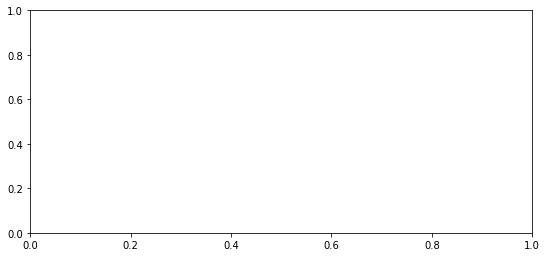

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(9,9))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["Train","Validation"])
plt.ylabel("Loss",fontsize = 12)
plt.xlabel("Training duration, [epochs]",fontsize = 12)
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["Train","Validation"])
plt.ylabel("Accuracy",fontsize = 12)
plt.xlabel("Training duration, [epochs]",fontsize = 12)

## Comparison

Text(0.5, 1.0, 'Accuracy')

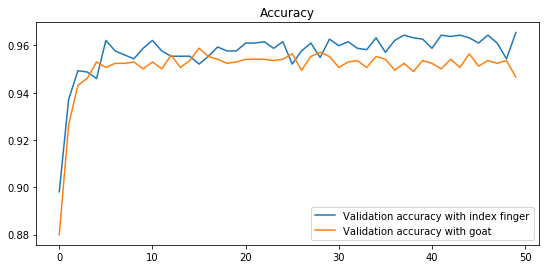

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(9,9))
plt.subplot(2,1,1)
plt.plot(history_new.history['val_accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["Validation accuracy with index finger","Validation accuracy with goat"])
plt.title("Accuracy")

In [32]:
pd.DataFrame.from_dict(history.history).to_csv('historyarduino4old.csv',index=False)
pd.DataFrame.from_dict(history_new.history).to_csv('historyarduino4new.csv',index=False)

In [28]:
model.save("../Data/arduino7gestures.h5")
from tensorflow.keras.models import load_model
model = load_model("../Data/arduino7gestures.h5")
from tinymlgen import port
print(port(model))


#ifdef __has_attribute
#define HAVE_ATTRIBUTE(x) __has_attribute(x)
#else
#define HAVE_ATTRIBUTE(x) 0
#endif
#if HAVE_ATTRIBUTE(aligned) || (defined(__GNUC__) && !defined(__clang__))
#define DATA_ALIGN_ATTRIBUTE __attribute__((aligned(4)))
#else
#define DATA_ALIGN_ATTRIBUTE
#endif

const unsigned char model_data[] DATA_ALIGN_ATTRIBUTE = {0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x12, 0x00, 0x1c, 0x00, 0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00, 0x14, 0x00, 0x00, 0x00, 0x18, 0x00, 0x12, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 0x64, 0x0f, 0x00, 0x00, 0x8c, 0x0a, 0x00, 0x00, 0x74, 0x0a, 0x00, 0x00, 0x34, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x44, 0xf1, 0xff, 0xff, 0x08, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x00, 0x00, 0x13, 0x00, 0x00, 0x00, 0x6d, 0x69, 0x6e, 0x5f, 0x72, 0x75, 0x6e, 0x74, 0x69, 0x6d, 0x65, 0x5f, 0x76, 0x65, 0x72, 0x73, 0x69, 0x6f, 0x6e, 0x00, 0x0d, 0x00, 0x00, 0x00, 0x34, 0x0a, 0x00, 0x00, 0x2c, 0x0a,